# Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.
 
 
 #### By Anupam Dash

In [1]:
#Loading Packages and Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,7]

In [2]:
train=pd.read_csv('Train.csv')
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


* The is the training data provided to us

In [3]:
test=pd.read_csv('Test.csv')
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


* This is the testing data provided to us and as we can see that it dose not have the target variable

In [4]:
print('Shape of the training data is ',train.shape)
print('Shape of the testing data is ',test.shape)

Shape of the training data is  (8523, 12)
Shape of the testing data is  (5681, 11)


* We are combining the data for better understanding and to do EDA on the data

In [5]:
comb=pd.concat([train,test], ignore_index=True)
print('The shape of the combined data is ',comb.shape)
comb.head()

The shape of the combined data is  (14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Checking the shape of the data after combining
comb.shape

(14204, 12)

In [7]:
# Checking the info of the data
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
comb.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [9]:
# Checking for the null value percentage of the data
comb.isnull().sum()*100/len(comb)

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

* As you can see thst the Item_weight and the Outlet size have 17.7% and 28.27% null values in the data respectively

### Univariate Analysis for Numerical features

In [10]:
comb.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

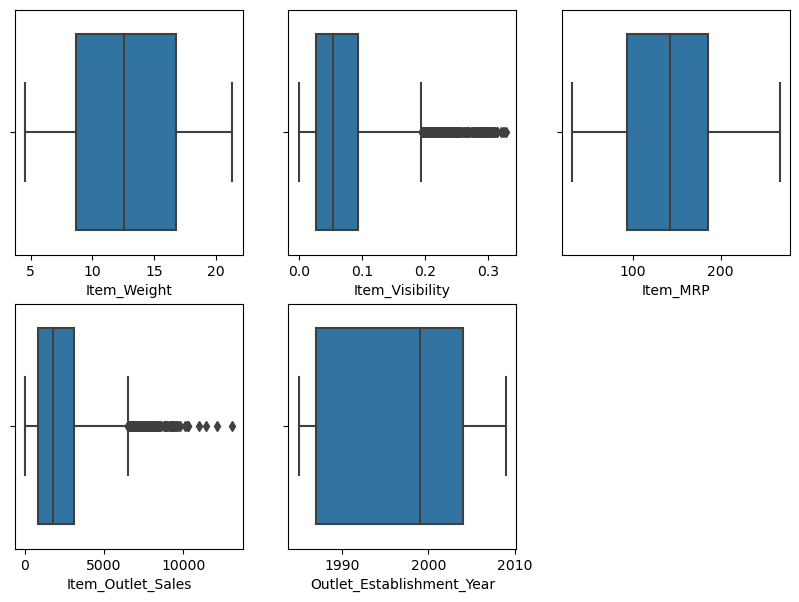

In [11]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']
it=1

for i in num_cols:
    plt.subplot(2,3,it)
    sns.boxplot(comb[i])
    it+=1
plt.show()

* As you can see from the graphs that Item_Visibility and Item_Outlet_Sales have some outliers

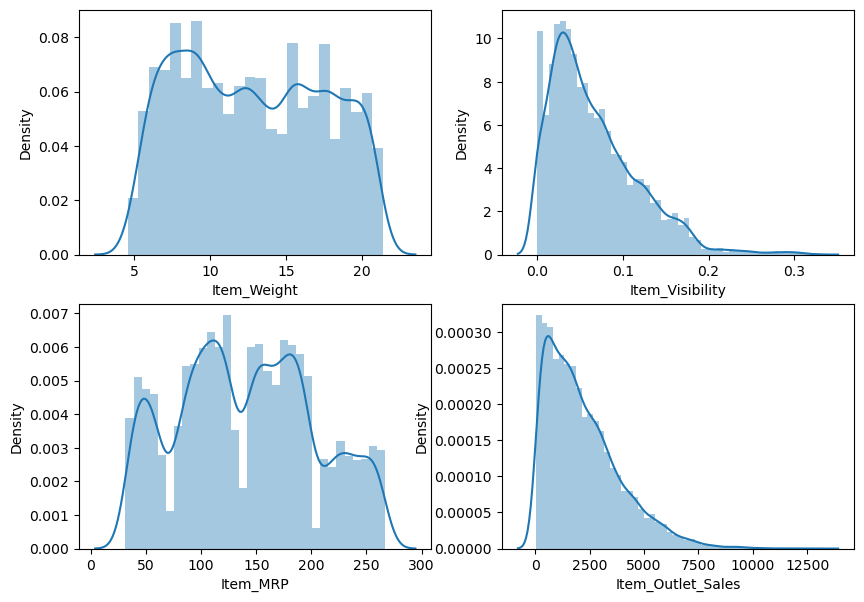

In [12]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
it=1

for i in num_cols:
    plt.subplot(2,2,it)
    sns.distplot(comb[i])
    it+=1
plt.show()

* As you can see from the graphs that Item_Visibility and Item_Outlet_Sales are Right Skewed

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

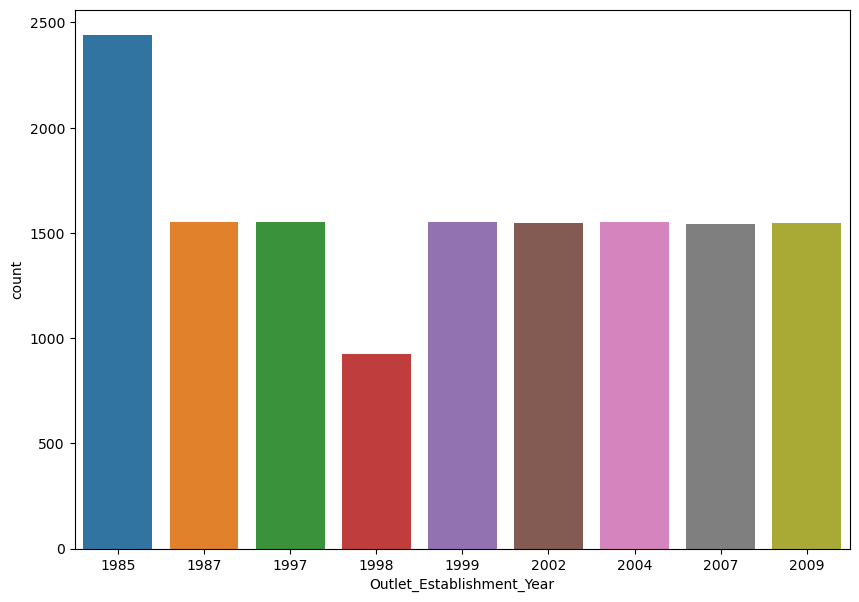

In [13]:
sns.countplot(comb.Outlet_Establishment_Year)

* We can consider year as a categorical feature and as you can see from the graph that 1985 has the highest number of store establishment and 1998 has the lowest number of store establishment

### Bivariate Analysis for Numerical features

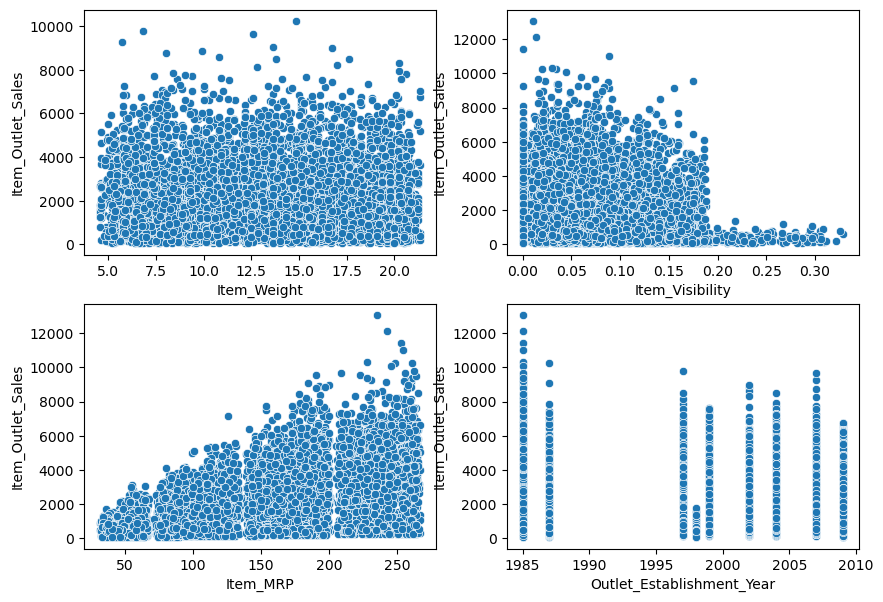

In [14]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
it=1

for i in num_cols:
    plt.subplot(2,2,it)
    sns.scatterplot(comb[i],comb['Item_Outlet_Sales'])
    it+=1
plt.show()

#### Univariate Analysis for categorical features

In [15]:
comb.select_dtypes(exclude=np.number).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

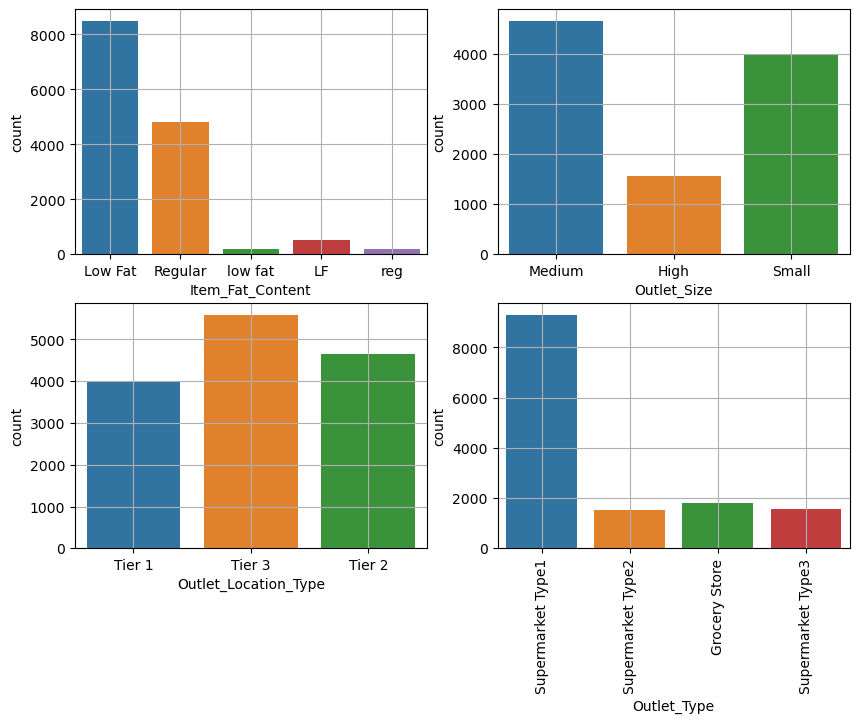

In [16]:
cat_cols=['Item_Fat_Content',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
it=1
for i in cat_cols:
    plt.subplot(2,2,it)
    sns.countplot(comb[i])
    plt.grid()
    it+=1
    
plt.xticks(rotation=90)
plt.show()

* Low fat product count is the highest in all the store
* Most of the outlets are medium sized
* The data consist of more number of Tire 3 cities which are the big cities
* Super market Type 1 has the highest count

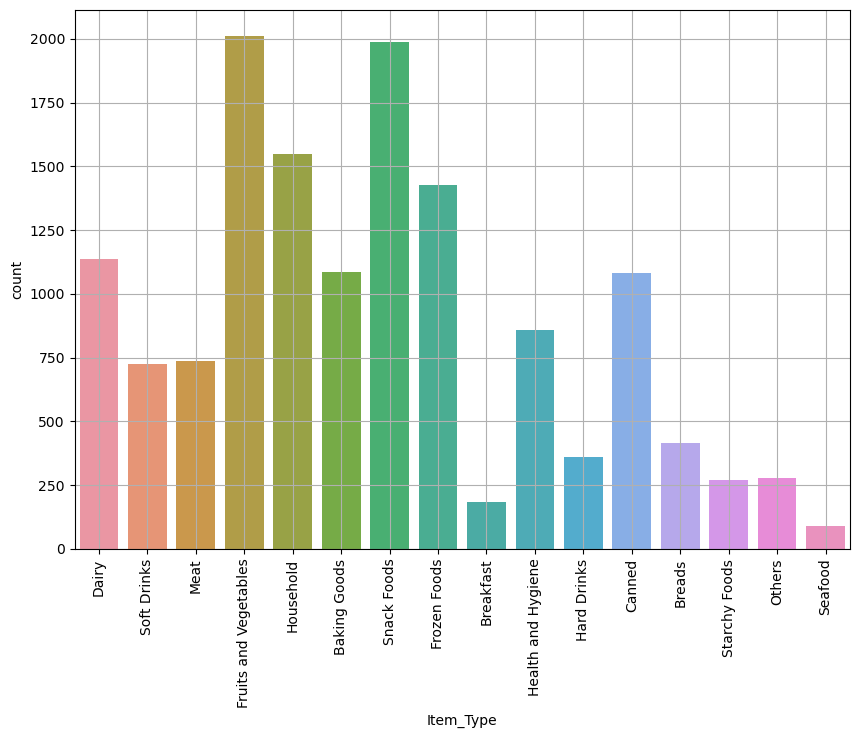

In [17]:
sns.countplot(comb['Item_Type'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [18]:
comb.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

* Fruits and vegitables is the the highest selling product and highest kept product 

### Biivariate Analysis for categorical features

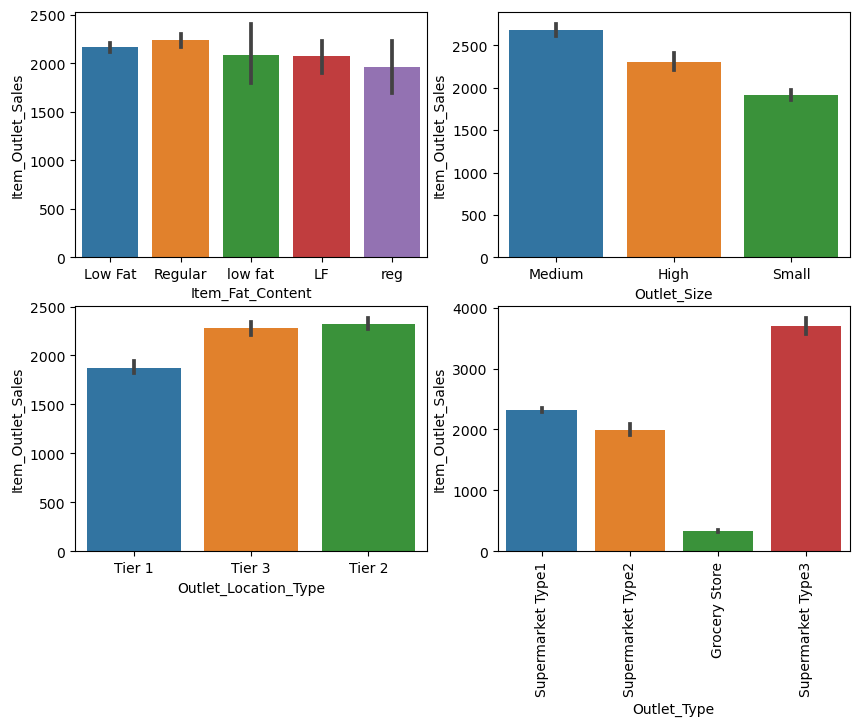

In [19]:
cat_cols=['Item_Fat_Content',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
it=1
for i in cat_cols:
    plt.subplot(2,2,it)
    sns.barplot(y=comb['Item_Outlet_Sales'],x=comb[i])
    it+=1
    
plt.xticks(rotation=90)
plt.show()

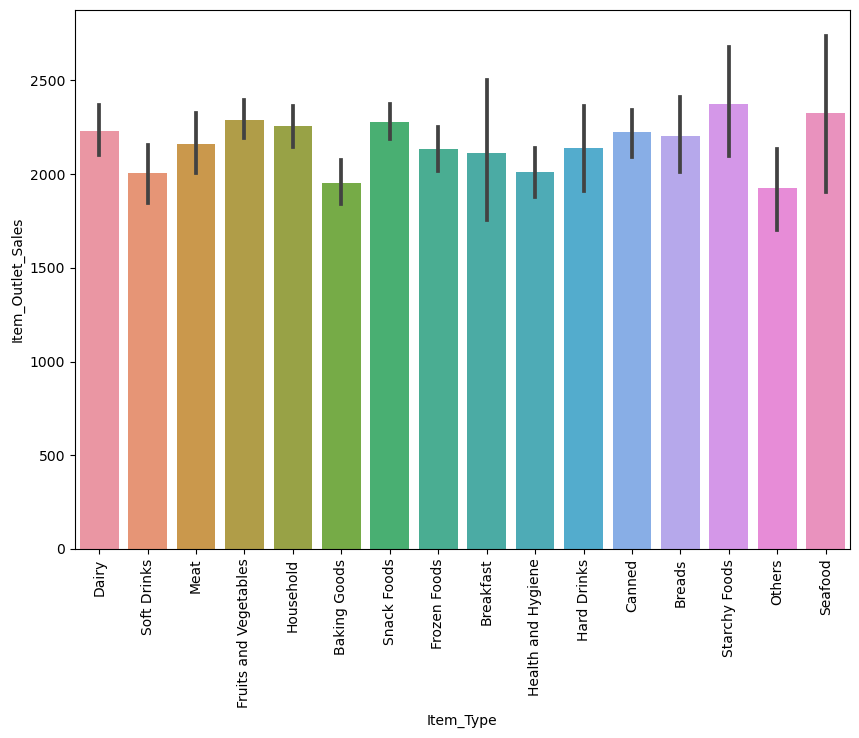

In [20]:
sns.barplot(y=comb['Item_Outlet_Sales'],x=comb['Item_Type'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

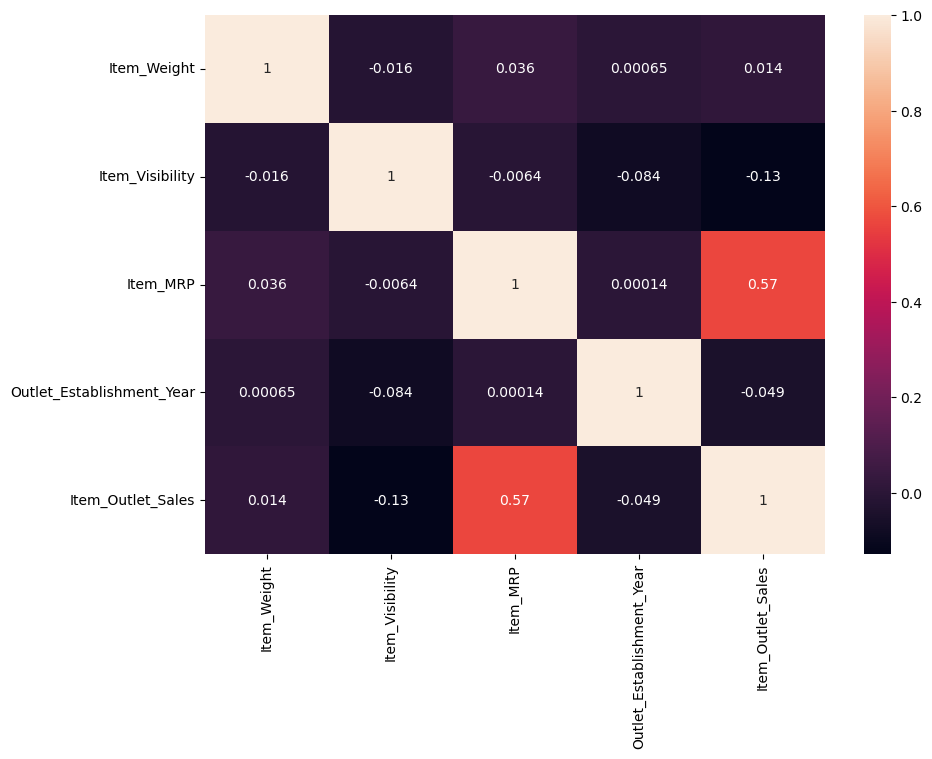

In [21]:
sns.heatmap(comb.corr(),annot=True)

### Imputing Null Values and correcting some mistakes

In [22]:
comb.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [23]:
comb.Item_Fat_Content.replace(to_replace = ["LF", "low fat"], 
                              value = ["Low Fat", "Low Fat"], inplace=True)
comb.Item_Fat_Content.replace(to_replace = ["reg"], value = ["Regular"], 
                              inplace = True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

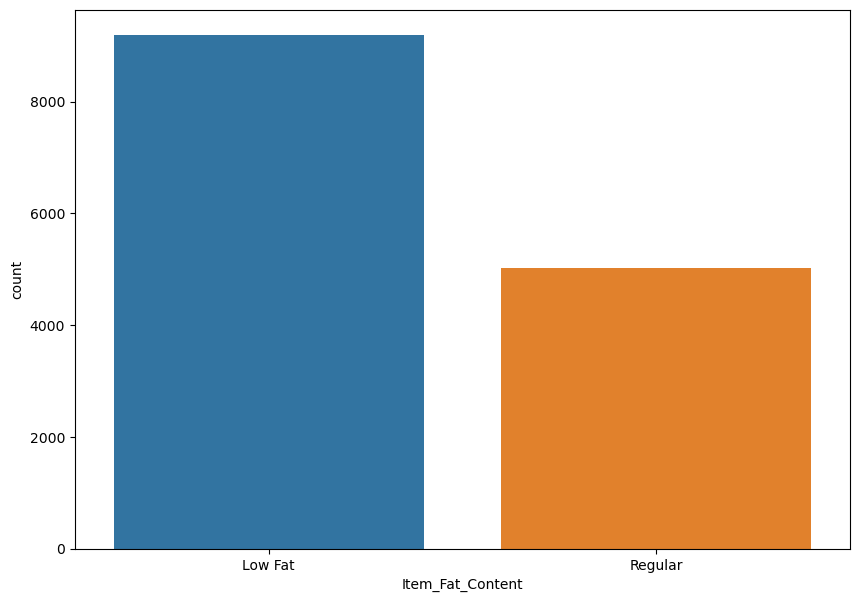

In [24]:
sns.countplot(comb.Item_Fat_Content)

In [25]:
comb[comb.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [26]:
comb[comb.Item_Identifier=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464
11896,FDP10,19.0,Low Fat,0.128612,Snack Foods,104.1622,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
12371,FDP10,19.0,Low Fat,0.214397,Snack Foods,105.8622,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
13327,FDP10,NaN,Low Fat,0.224269,Snack Foods,104.4622,OUT019,1985,Small,Tier 1,Grocery Store,NaN


In [27]:
l1=[]
l2=[]
for i,j in zip(comb.Item_Identifier,comb.Item_Weight):
    if j != np.nan:
        if i not in l1:
            l1.append(i)
            l2.append(j)

In [28]:
di=pd.DataFrame(columns=['a','b'])
di['a']=l1
di['b']=l2

In [29]:
di

,a,b
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
1554,FDD28,10.695
1555,FDU43,NaN
1556,NCF55,6.675
1557,NCW30,5.210


In [30]:
for i,j in zip(di.a,di.b):
    comb.loc[(comb['Item_Identifier']==i) & (comb['Item_Weight'].isnull()), 'Item_Weight']=j

In [31]:
comb.isnull().sum()*100/len(comb)

Item_Identifier               0.000000
Item_Weight                   3.062518
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

In [32]:
comb[comb.Outlet_Identifier=='OUT01']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [33]:
dj=pd.DataFrame(comb.groupby(['Item_Type'])['Item_Weight'].mean())
dj.head()

,Item_Weight
Item_Type,
Baking Goods,12.289237
Breads,11.246191
Breakfast,13.090540
Canned,12.273079
Dairy,13.227308


In [34]:
for i,j in zip(dj.index,dj.Item_Weight):
    comb.loc[(comb['Item_Type']==i) & (comb['Item_Weight'].isnull()), 'Item_Weight']=j

In [35]:
comb.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [36]:
comb[comb.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [37]:
comb[comb.Outlet_Identifier=='OUT010']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
14094,FDI15,13.800,Low Fat,0.236595,Dairy,265.0884,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14095,NCH43,8.420,Low Fat,0.118118,Household,216.9192,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14103,FDA23,9.800,Low Fat,0.078981,Baking Goods,100.1016,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14173,FDC10,9.800,Regular,0.121982,Snack Foods,119.7098,OUT010,1998,NaN,Tier 3,Grocery Store,NaN


In [38]:
pd.DataFrame(comb.groupby(["Outlet_Location_Type", "Outlet_Type"])
             ["Outlet_Size"].value_counts())

Outlet_Size
Outlet_Location_Type Outlet_Type       Outlet_Size             
Tier 1               Grocery Store     Small                880
                     Supermarket Type1 Medium              1550
                                       Small               1550
Tier 2               Supermarket Type1 Small               1550
Tier 3               Supermarket Type1 High                1553
                     Supermarket Type2 Medium              1546
                     Supermarket Type3 Medium              1559

In [39]:
comb.loc[(comb["Outlet_Location_Type"]=="Tier 2") & (comb["Outlet_Type"]=="Supermarket Type1"),"Outlet_Size"]="Small"

In [40]:
comb.loc[(comb["Outlet_Location_Type"]=="Tier 3") & (comb["Outlet_Type"]=="Grocery Store"),"Outlet_Size"]="Medium"

In [41]:
comb.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
comb.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [43]:
#Item Visibility
comb.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [44]:
# As item visibility is a right skewed feature we have to impute the median to the zeros
comb["Item_Visibility"].replace(to_replace=0, value = 0.054021, 
                                 inplace = True)

### Adding new features and modifying existing features

In [45]:
# Outlet Age
comb["Outlet_Age"] = 2013 - comb.Outlet_Establishment_Year

In [46]:
comb.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4


In [47]:
comb.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [48]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast',
              'Breads','Seafood']

In [49]:
def enc(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")
    
comb.Item_Type=comb.Item_Type.apply(enc)

In [50]:
len(comb.Item_Type.unique())

2

### Transforming Item Visibility as it is Right Skewed

In [51]:
# We are using Square Root transformation to make it a normal distribution

In [52]:
comb.Item_Visibility=np.sqrt(comb.Item_Visibility)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

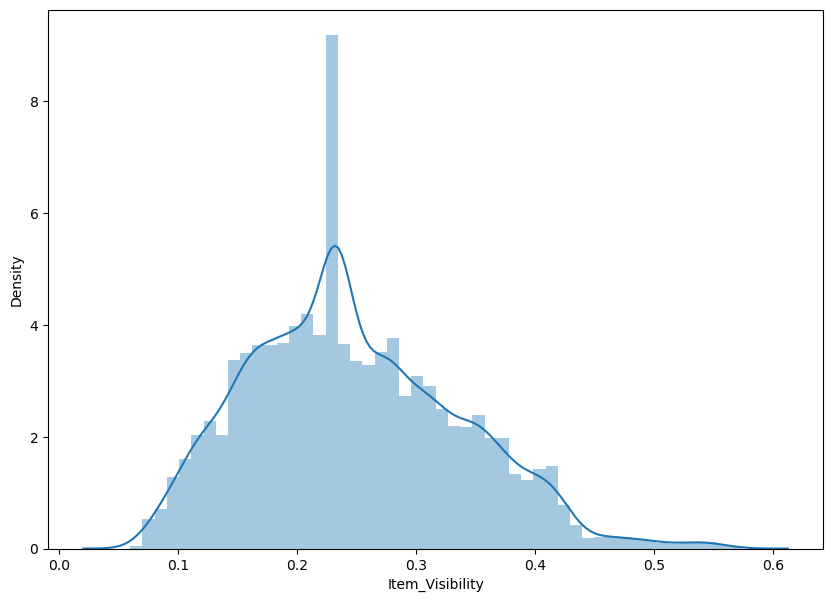

In [53]:
sns.distplot(comb.Item_Visibility)

In [54]:
comb.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.126678,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.138846,Non Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.129461,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.232424,Perishables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.232424,Non Perishables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


### Dropping columns to Scale and Encode the data

In [55]:
comb2=comb.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [56]:
comb3=comb2.iloc[0:train.shape[0]]

In [57]:
ytrain=comb3.Item_Outlet_Sales
xtrain=comb3.drop(['Item_Outlet_Sales'],axis=1)

In [58]:
xtest=comb2.iloc[train.shape[0]:]
xtest.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [59]:
xtrain.shape,xtest.shape,ytrain.shape

((8523, 9), (5681, 9), (8523,))

In [60]:
xtrain=pd.get_dummies(xtrain,drop_first=True)
xtest=pd.get_dummies(xtest,drop_first=True)

In [61]:
xtrain.shape,xtest.shape,ytrain.shape

((8523, 13), (5681, 13), (8523,))

### As we don't have the test results we have to split out train data to check the accuracy and to get a idea how accurate our modes are.

In [62]:
dummytrain=xtrain.copy(deep=True)
y=ytrain.copy(deep=True)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [64]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
lr = LinearRegression()
rmse_train =[]
rmse_test =[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] # Validation Set
    ytest = y.iloc[test_index] # Validation Set
    pred_train=lr.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lr.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

1127.7890030679919
1129.7088917391109


In [65]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.5)
rmse_train =[]
rmse_test =[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] # Validation Set
    ytest = y.iloc[test_index] # Validation Set
    pred_train=lasso.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lasso.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

1128.0345281681514
1129.810226802714


In [66]:
# Lasso
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
rmse_train =[]
rmse_test =[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] # Validation Set
    ytest = y.iloc[test_index] # Validation Set
    pred_train=ridge.fit(xtrain, ytrain).predict(xtrain)
    pred_test=ridge.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

1127.7958320369569
1129.7040455400743


In [67]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
rf = RandomForestRegressor(n_estimators=500, min_samples_leaf=4,
                          random_state = 0)
rmse_train =[]
rmse_test =[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] # Validation Set
    ytest = y.iloc[test_index] # Validation Set
    pred_train=rf.fit(xtrain, ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

742.2674789942533
1108.9744809124002


In [68]:
# Gradient Boosting Regressor
gbm = GradientBoostingRegressor()
rmse_train =[]
rmse_test =[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] # Validation Set
    ytest = y.iloc[test_index] # Validation Set
    pred_train=gbm.fit(xtrain, ytrain).predict(xtrain)
    pred_test=gbm.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

1032.756559735859
1092.479572026847


In [69]:
#Xtreame Gradient Boosting
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth = 2, n_estimators = 49, 
                   reg_lambda = 1.6)
rmse_train =[]
rmse_test =[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] # Validation Set
    ytest = y.iloc[test_index] # Validation Set
    pred_train=xgb.fit(xtrain, ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

1066.7414525028871
1096.4326738789575


### As you can see from the RMSE scores Gradient Boosting Regressor and Xtreame Gradient Boosting models are the best peforming models.